# 🛰️ Sentinel-1 SAR Image Processing with openEO (Export to GeoTIFF)
This notebook uses the openEO API to process a Sentinel-1 SAR image (VV polarization), and exports it as a GeoTIFF file. To be able to download the image, the user will need an account in openEO. The notebook will ask for authentication while running it.

Reference: https://documentation.dataspace.copernicus.eu/APIs/openEO/openeo-community-examples/python/OilSpill/OilSpillMapping.html


In [1]:
# Import libraries
import openeo
import rasterio
import matplotlib.pyplot as plt

c:\Users\Bruna\Documents\repos\oil_spill_segmentation\oil_segmentation_env\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Connect and authenticate to Copernicus Data Space openEO backend
connection = openeo.connect("openeo.dataspace.copernicus.eu").authenticate_oidc()

Authenticated using refresh token.


In [3]:
# Define the area of interest (AOI) - Sentinel-1 patch
aoi = {
    "type": "Polygon",
    "coordinates": [
        [
            [34.2430882356336, 34.1860792481070],  # UR
            [34.3797790095640, 34.1660375298848],  # UL
            [34.3546654835910, 34.0509074628334],  # BL
            [34.2179747096606, 34.0709491810556],  # BR
            [34.2430882356336, 34.1860792481070]   # Close polygon
        ]
    ]
}

# Load Sentinel-1 VV backscatter data
s1_image_original = connection.load_collection(
    "SENTINEL1_GRD",
    temporal_extent=["2019-06-18", "2019-06-19"],
    spatial_extent=aoi,
    bands=["VV"]
)

# Apply backscatter calibration
s1_image = s1_image_original.sar_backscatter(coefficient="sigma0-ellipsoid")

In [4]:
# Export the processed image as GeoTIFF
job = s1_image.execute_batch(
    title="Sentinel1_Processed_TIFF",
    outputfile="../data/satellite_results/1_Sentinel1_from_openEO.tif",
    out_format="GTIFF"
)

0:00:00 Job 'j-25082602041649c7994f24c3b4ff3c56': send 'start'
0:00:18 Job 'j-25082602041649c7994f24c3b4ff3c56': created (progress 0%)
0:00:23 Job 'j-25082602041649c7994f24c3b4ff3c56': created (progress 0%)
0:00:30 Job 'j-25082602041649c7994f24c3b4ff3c56': created (progress 0%)
0:00:38 Job 'j-25082602041649c7994f24c3b4ff3c56': created (progress 0%)
0:00:48 Job 'j-25082602041649c7994f24c3b4ff3c56': created (progress 0%)
0:01:00 Job 'j-25082602041649c7994f24c3b4ff3c56': running (progress N/A)
0:01:16 Job 'j-25082602041649c7994f24c3b4ff3c56': running (progress N/A)
0:01:35 Job 'j-25082602041649c7994f24c3b4ff3c56': running (progress N/A)
0:01:59 Job 'j-25082602041649c7994f24c3b4ff3c56': running (progress N/A)
0:02:29 Job 'j-25082602041649c7994f24c3b4ff3c56': running (progress N/A)
0:03:06 Job 'j-25082602041649c7994f24c3b4ff3c56': finished (progress 100%)


In [5]:
results = job.get_results()
results.download_files("../data/satellite_results") 

[WindowsPath('../data/satellite_results/openEO_2019-06-18Z.tif'),
 WindowsPath('../data/satellite_results/job-results.json')]

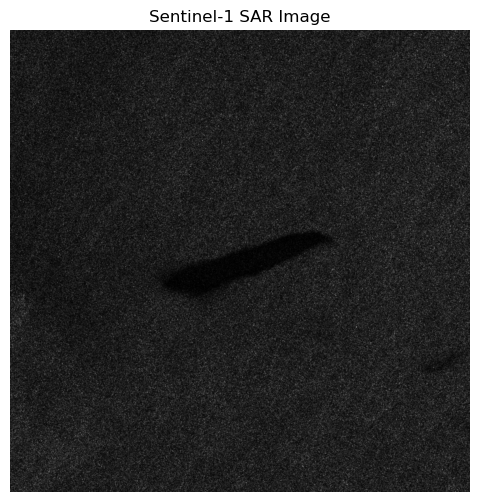

In [ ]:
# Visualize the image after download
with rasterio.open("../data/satellite_results/1_Sentinel1_from_openEO.tif") as src:
    image = src.read(1)

plt.figure(figsize=(6, 6))
plt.imshow(image, cmap='gray')
plt.title("Sentinel-1 SAR Image")
plt.axis('off')
plt.show()